In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import ComplementNB
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Lungs_Data.csv')
df.head()

,Age,Gender,Location,Sound type,Diagnosis,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,"Posterior: P Lower: L Left: L Right R, UPPER: U, ANTERIOR: A, MIDDLE: M",Unnamed: 10
0,70.0,M,P L L,I E W,Asthma,NaN,NaN,NaN,NaN,"Insipratory: I, Experiatory: E, Wheezes: W, Cr...",NaN
1,52.0,F,P L L,E W,Asthma,NaN,NaN,NaN,NaN,Crep:crepitations,NaN
2,50.0,F,P L L,I E W,Asthma,NaN,NaN,NaN,NaN,NaN,NaN
3,72.0,F,P R L,I C,Heart Failure + Lung Fibrosis,NaN,NaN,NaN,NaN,NaN,NaN
4,71.0,M,P R L,I C E W,Heart Failure + COPD,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [3]:
df.isnull().sum()

Age                                                                         42
Gender                                                                      42
Location                                                                    42
Sound type                                                                  42
Diagnosis                                                                   42
Unnamed: 5                                                                 152
Unnamed: 6                                                                 152
Unnamed: 7                                                                 154
Unnamed: 8                                                                 154
Posterior: P Lower: L Left: L Right R, UPPER: U, ANTERIOR: A, MIDDLE: M    152
Unnamed: 10                                                                154
dtype: int64

In [4]:
#Drop NaN values
df.drop(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7','Unnamed: 8', 'Unnamed: 10', 'Posterior: P Lower: L Left: L Right R, UPPER: U, ANTERIOR: A, MIDDLE: M'], axis = 1, inplace = True)
df.dropna(axis = 0, how = 'all', inplace = True )

In [5]:
df.head(10)

,Age,Gender,Location,Sound type,Diagnosis
0,70.0,M,P L L,I E W,Asthma
1,52.0,F,P L L,E W,Asthma
2,50.0,F,P L L,I E W,Asthma
3,72.0,F,P R L,I C,Heart Failure + Lung Fibrosis
4,71.0,M,P R L,I C E W,Heart Failure + COPD
5,81.0,M,P R L,I C B,Plueral Effusion
6,65.0,M,P R L,I C E W,Heart Failure + COPD
7,70.0,M,P L L,I C B,Plueral Effusion
8,59.0,M,P R L,E W,Asthma
9,59.0,M,P R U,E W,Asthma


In [6]:
#Remove extra, or trailing and leadning white spaces
df['Location'], df['Sound type'], df['Diagnosis'] = df['Location'].str.strip(), df['Sound type'].str.strip(), df['Diagnosis'].str.strip()

In [7]:
#Replace + with and sentence case
df['Diagnosis'] = df['Diagnosis'].str.replace('+', 'and', regex = True).str.title()
df['Diagnosis'].unique()

array(['Asthma', 'Heart Failure And Lung Fibrosis',
       'Heart Failure And Copd', 'Plueral Effusion', 'Heart Failure',
       'Copd', 'Pneumonia', 'Asthma And Lung Fibrosis', 'Bron',
       'Lung Fibrosis', 'N'], dtype=object)

In [8]:
df['Location'].unique()

array(['P L L', 'P R L', 'P R U', 'A R M', 'P R M', 'P L U', 'P L M',
       'A R L', 'A L U', 'A R U'], dtype=object)

In [9]:
df['Sound type'].unique()

array(['I E W', 'E W', 'I C', 'I C E W', 'I C B', 'C', 'Crep', 'N',
       'Bronchial'], dtype=object)

# Feature Extraction

In [10]:
le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
df['Location'].unique()
#4 - PLL
#7 - PRL
#9 - PRU
#2 - ARM
#8 - PRM
#6 - PLU
#5 - PLM
#1 - ARL
#0 - ALU
#3 - ARU

array([4, 7, 9, 2, 8, 6, 5, 1, 0, 3])

In [11]:
df['Sound type'] = le.fit_transform(df['Sound type'])
df['Sound type'].unique()
#7 - IEW
#3 - EW
#4 - IC
#6 - ICEW
#5 - ICB
#1 - C
#2 - CREP
#8 - N
#0 - Bronchial

array([7, 3, 4, 6, 5, 1, 2, 8, 0])

In [12]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Gender'].unique()
X = np.array(df.loc[:, 'Age': 'Sound type'])
X

array([[70.,  1.,  4.,  7.],
       [52.,  0.,  4.,  3.],
       [50.,  0.,  4.,  7.],
       [72.,  0.,  7.,  4.],
       [71.,  1.,  7.,  6.],
       [81.,  1.,  7.,  5.],
       [65.,  1.,  7.,  6.],
       [70.,  1.,  4.,  5.],
       [59.,  1.,  7.,  3.],
       [59.,  1.,  9.,  3.],
       [53.,  1.,  4.,  1.],
       [50.,  0.,  4.,  3.],
       [55.,  1.,  4.,  1.],
       [54.,  1.,  2.,  1.],
       [49.,  0.,  9.,  3.],
       [56.,  1.,  9.,  1.],
       [57.,  1.,  2.,  3.],
       [57.,  1.,  9.,  1.],
       [70.,  0.,  9.,  1.],
       [90.,  1.,  2.,  1.],
       [20.,  1.,  7.,  2.],
       [24.,  1.,  9.,  2.],
       [50.,  1.,  7.,  2.],
       [76.,  0.,  7.,  2.],
       [76.,  1.,  4.,  3.],
       [90.,  0.,  4.,  2.],
       [53.,  0.,  8.,  3.],
       [68.,  0.,  6.,  2.],
       [57.,  1.,  4.,  2.],
       [18.,  0.,  8.,  8.],
       [27.,  0.,  5.,  8.],
       [30.,  1.,  1.,  8.],
       [43.,  0.,  8.,  3.],
       [78.,  0.,  8.,  2.],
       [38.,  

In [13]:
df['Diagnosis'] = le.fit_transform(df['Diagnosis'])
df['Diagnosis'].unique()
# 0 - Asthma
# 6 - Heart Failure And LUng Fibrosis
# 5 - Heart Failure and COPD
# 9 - Plueral Effusion
# 4 - Heart Failure
# 3 - COPD
# 10 - Pneumonia
# 1 - Asthma And Lung Fibrosis
# 2 - BRON
# 7 - Lung Fibrosis
# 8 - N(Normal)

array([ 0,  6,  5,  9,  4,  3, 10,  1,  2,  7,  8])

In [14]:
y = np.array(df['Diagnosis'])
y

array([ 0,  0,  0,  6,  5,  9,  5,  9,  0,  0,  4,  0,  4,  4,  0,  4,  3,
       10,  4,  1,  2,  2,  7,  4,  3,  7,  0,  2,  4,  8,  8,  8,  0,  4,
        0, 10, 10,  0,  4,  4, 10,  4,  0,  0,  4,  0,  0,  8,  8,  8,  8,
        7,  0,  4,  0,  0,  3,  0,  4,  4,  3,  3,  3,  0,  0,  4,  4,  0,
       10,  8,  8,  8,  8,  8,  8,  8,  0,  0,  0,  0,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  4,  0,  8,  8,  8,  8,  8,  0,  8,  8,  8,  0,  8,
        8,  0,  7,  0,  0,  3,  8,  3,  3,  8])

# Stratified KFold Cross Validation and Model Fitting

In [15]:
ac_comNB = []
ac_svm = []
ac_lr = []
ac_rf = []

def get_model_predict(model, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    ac = accuracy_score(y_test, prediction)
    return ac

def get_lr_score (model, X_train, X_test, y_train, y_test):
    import sklearn.metrics as sm
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    return sm.r2_score(y_test, prediction)

In [16]:
sKF = StratifiedKFold(n_splits = 5)
sKF.get_n_splits(X, y)
for train_index, test_index in sKF.split(X, y):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
    ac_comNB.append(get_model_predict(ComplementNB(), X_train, X_test, y_train, y_test))
    ac_svm.append(get_model_predict(svm.SVC(), X_train, X_test, y_train, y_test))
    ac_lr.append(get_lr_score(LinearRegression(), X_train, X_test, y_train, y_test))
    ac_rf.append(get_model_predict(RandomForestClassifier(n_estimators = 100), X_train, X_test, y_train, y_test))

print(ac_comNB)
print(ac_svm)
print(ac_lr)
print(ac_rf)

C:\Users\rambo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[0.5217391304347826, 0.5652173913043478, 0.45454545454545453, 0.45454545454545453, 0.5]
[0.43478260869565216, 0.43478260869565216, 0.5, 0.36363636363636365, 0.3181818181818182]
[0.0269630538207678, 0.355512552196412, 0.2702742165018287, 0.4048236222640468, 0.38618908869536805]
[0.6521739130434783, 0.6956521739130435, 0.8181818181818182, 0.7727272727272727, 0.6818181818181818]


In [17]:
#Using cross_val_score
from sklearn.model_selection import cross_val_score
#complement Naive Bayes
cross_val_score(ComplementNB(), X, y)

C:\Users\rambo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


array([0.52173913, 0.56521739, 0.45454545, 0.45454545, 0.5       ])

In [18]:
#SVM
cross_val_score(svm.SVC(), X, y)

C:\Users\rambo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


array([0.43478261, 0.43478261, 0.5       , 0.36363636, 0.31818182])

In [19]:
#Linear Regression
cross_val_score(LinearRegression(), X, y)

array([-0.4164384 , -0.08989301,  0.27353228,  0.32939313,  0.6731312 ])

In [20]:
#Random Forest
cross_val_score(RandomForestClassifier(), X, y)

C:\Users\rambo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


array([0.65217391, 0.69565217, 0.81818182, 0.77272727, 0.63636364])

# Confusion Matrix

In [21]:
ac_comNB2 = []
ac_svm2 = []
ac_rf2 = []

def get_model_predict(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    cm = confusion_matrix(y_test, prediction)
    return cm

for train_index, test_index in sKF.split(X, y):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
    
    ac_comNB2.append(get_model_predict(ComplementNB(), X_train, X_test, y_train, y_test))
    ac_svm2.append(get_model_predict(svm.SVC(), X_train, X_test, y_train, y_test))
    ac_rf2.append(get_model_predict(RandomForestClassifier(n_estimators = 100), X_train, X_test, y_train, y_test))

C:\Users\rambo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


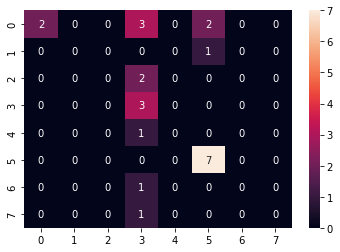

In [22]:
#Complement NB Fold 1
ax = sns.heatmap(ac_comNB2[0], annot = True)

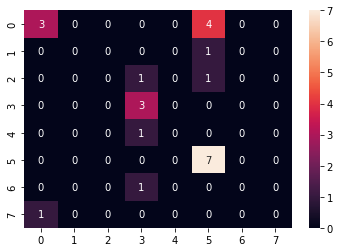

In [23]:
#Complement NB Fold 2
ax = sns.heatmap(ac_comNB2[1], annot = True)

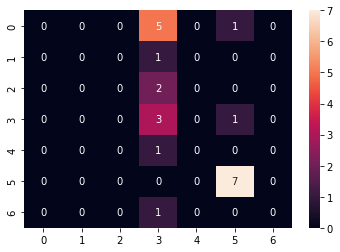

In [24]:
#Complement NB Fold 3
ax = sns.heatmap(ac_comNB2[2], annot = True)

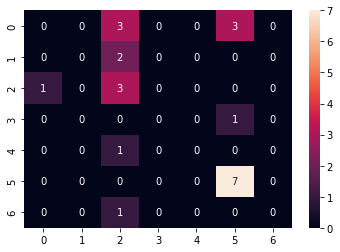

In [25]:
#Complement NB Fold 4
ax = sns.heatmap(ac_comNB2[3], annot = True)

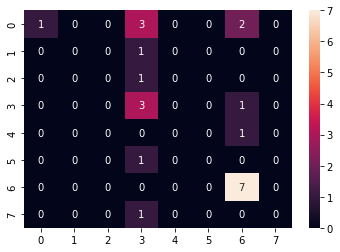

In [26]:
#Complement NB Fold 5
ax = sns.heatmap(ac_comNB2[4], annot = True)

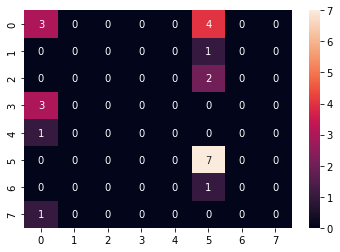

In [27]:
# SVM Fold 1
ax = sns.heatmap(ac_svm2[0], annot = True)

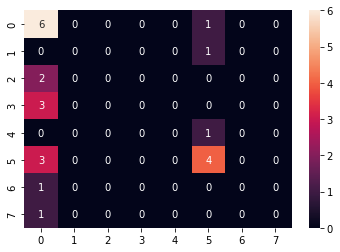

In [28]:
# SVM Fold 2
ax = sns.heatmap(ac_svm2[1], annot = True)

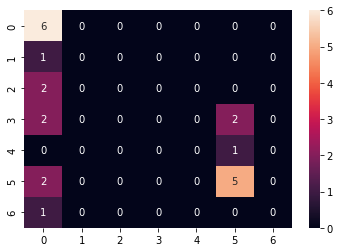

In [29]:
# SVM Fold 3
ax = sns.heatmap(ac_svm2[2], annot = True)

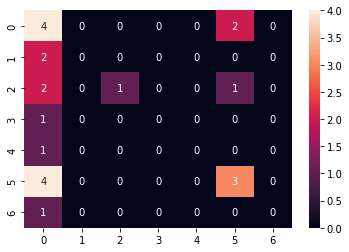

In [30]:
# SVM Fold 4
ax = sns.heatmap(ac_svm2[3], annot = True)

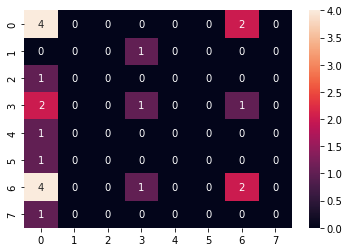

In [31]:
# SVM Fold 5
ax = sns.heatmap(ac_svm2[4], annot = True)

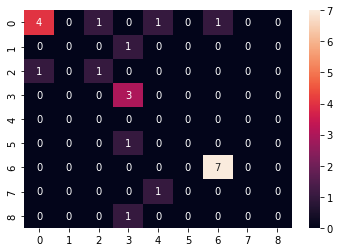

In [32]:
# Random Forest Fold 1
ax = sns.heatmap(ac_rf2[0], annot = True)

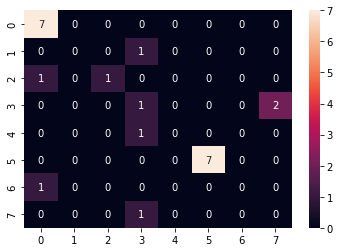

In [33]:
# Random Forest Fold 2
ax = sns.heatmap(ac_rf2[1], annot = True)

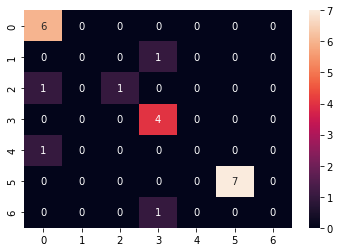

In [34]:
# Random Forest Fold 3
ax = sns.heatmap(ac_rf2[2], annot = True)

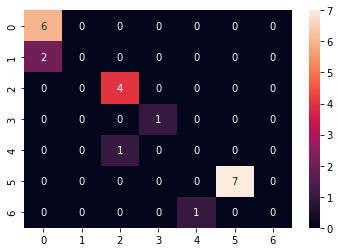

In [35]:
# Random Forest Fold 4
ax = sns.heatmap(ac_rf2[3], annot = True)

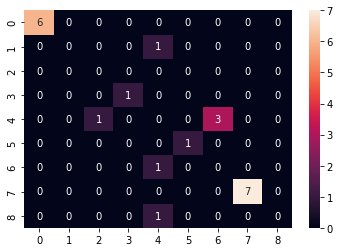

In [36]:
# Random Forest Fold 5
ax = sns.heatmap(ac_rf2[4], annot = True)

# Accuracy Score

In [37]:
ave_ac_comNB = sum(ac_comNB)/len(ac_comNB)
ave_ac_svm = sum(ac_svm)/len(ac_svm)
ave_ac_lr = sum(ac_lr)/len(ac_lr)
ave_ac_rf = sum(ac_rf)/len(ac_rf)

In [38]:
# Complement NB Average Accuracy
ave_ac_comNB

0.4992094861660079

In [39]:
# SVM Average Average Accuracy
ave_ac_svm

0.41027667984189725

In [40]:
# Linear Regression Average Accuracy
ave_ac_lr

0.2887525066956847

# Cross Validation Score

In [41]:
cross_val_comNB =  cross_val_score(ComplementNB(), X, y)
cross_val_svm = cross_val_score(svm.SVC(), X, y)
cross_val_lr = cross_val_score(LinearRegression(), X, y)
cross_val_rf = cross_val_score(RandomForestClassifier(), X, y)

C:\Users\rambo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\rambo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\rambo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [42]:
cross_val_comNB = sum(cross_val_comNB)/len(cross_val_comNB)
cross_val_svm = sum(cross_val_svm)/len(cross_val_svm)
cross_val_lr = sum(cross_val_lr)/len(cross_val_lr)
cross_val_rf = sum(cross_val_rf)/len(cross_val_rf)

In [43]:
#Average Cross Validation Score for ComplementNB
cross_val_comNB

0.4992094861660079

In [44]:
#Average Cross Validation Score for SVM
cross_val_svm

0.41027667984189725

In [45]:
#Average Cross Validation Score for Linear Regression
cross_val_lr

0.15394503941375667

In [46]:
#Average Cross Validation Score for Linear Regression
cross_val_rf

0.733201581027668